<div class="usecase-title"><padding-left: 15px><padding-bottom: 10px><padding-top: 10px>
    <padding-right: 15px>
    <background-color: #Black><p style="color:#14a38e;"><b>Pedestrains Counts and Bus-stops</b></p></div>

<div class="usecase-authors"><b>Authored by: </b>Shilpa Sharma</div>

<div class="usecase-duration"><b>Duration:</b> 120 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Machine learning, Data Analysis, Github</div>
</div>

<div class="usecase-section-header">Scenario</div>

<b>Imagine the vibrant city of Melbourne grappling with the dual challenges of urban mobility and pedestrian flow. As the city evolves,</b> so does the need for a transit system that not only efficiently moves people but also integrates seamlessly with the bustling pedestrian life. With the growing population, this city needs extensive mode of transportation network for the public; so isn't it important to understand the relationship between the bus-stops and pedestrains counts? 

<b>To address this challenge, a comprehensive study delves into the relationship between bus stops and pedestrian counts. The objective </b> is to understand spatial and temporal patterns, identifying areas where pedestrian activity peaks in conjunction with bus arrivals. This analysis becomes imperative to enhance urban planning, ensuring that the placement and distribution of bus stops align with the ebb and flow of pedestrian traffic. By optimizing this symbiotic relationship, the scenario aims to create a more seamless and efficient urban environment, improving both public transportation and the pedestrian experience in the heart of Melbourne.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- Mastered how to import/export open data using API.
- Import libraries, check for missing /null values in order to have a clean dataset.
- Data visualisation by using matplotlib, seaborn, geopanda.
- histograms, coeffiecient matrix, temporal patterns etc.
- Explaining the code by using the dashboards in order make it understandable for either technical or non-technical stakeholders.

<div class="usecase-section-header">Initiation</div>

<b>Navigating the intricate dance between public transportation and pedestrian activity is a critical endeavor in the urban orchestration of a city like Melbourne. The synergy </b> between bus stops and pedestrian thoroughfares is not merely an infrastructural concern but a key determinant of urban vitality and accessibility. In the heart of Melbourne's bustling urban canvas, this initiative aims to delve into the interplay of spatial and temporal dynamics surrounding bus stops and pedestrian counts.

<b>By conducting a meticulous analysis, we endeavor to unravel the patterns that govern the ebb and flow of movement, thereby providing valuable insights</b> for city planners. In our pursuit, we will harness datasets that pinpoint the geographic coordinates of bus stops and capture the pulse of pedestrian activity. For a holistic perspective, we remain adaptable, considering diverse data sources beyond the client's open data portal. This exploration, rooted in the essence of Melbourne's urban spirit, seeks to pave the way for a cityscape where the symbiosis between public transit and pedestrian life is finely tuned, fostering an urban environment that seamlessly integrates mobility with the rhythm of daily life.

In [88]:
#import Libraries
import requests
import pandas as pd
import time  

# Function to get data from the website using API
def get_data(base, data_url, offset=0):
    # Set the filters, limit retrieves 20 rows at a time, offset says where to start data collection
    filters = f'records?limit={50}&offset={offset}&timezone=UTC'
    # Make the URL from base, data URL, and filters variables stored outside the loop
    url = f'{base}{data_url}/{filters}'
    # Initialize max_results before the API request
    max_results = 0
    # Use the requests function to get the data
    result = requests.get(url)
    # Check that the request works, error code 200 = successful
    if result.status_code == 200:
        # Save results as a JSON file
        result_json = result.json()
        # Update the max_results variable with the total of the dataset
        max_results = result_json['total_count']
        # Save the results key data to a list variable
        records = result_json['results']
    else:
        # If data is not collected correctly return the error
        print("ERROR GETTING DATA: ", result.status_code)
        # Initialize records as an empty list
        records = []
    # At the end of the function, return the JSON results in records, max_results count, and offset
    return [records, max_results, offset]

# Collect data from API

# Set offset increment
OFFSET_INCREMENT = 50

# Base URL 
BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'

# Set specific URLs for the two datasets
SPECIFIC_PATH_1 = 'bus-stops'
SPECIFIC_PATH_2 = 'pedestrian-counting-system-monthly-counts-per-hour'

# Call the get data function for the first dataset
result_1 = get_data(BASE_URL, SPECIFIC_PATH_1)

# Save the records data returned in the get_data function to records list variable
records_1 = result_1[0]

# Save the dataset size data returned in the get_data function to max_results variable
max_results_1 = result_1[1]

# Increase the offset returned in the get_data function (result[2]) by the offset increment
offset_1 = result_1[2] + OFFSET_INCREMENT

# Check the length of the data returned and compare it against the max_results variable
# If the length of the data is less than the max_results, run the while loop
while len(records_1) != max_results_1:
    # Call the get data function again, passing in URL, specific path, and new offset value
    data_1 = get_data(BASE_URL, SPECIFIC_PATH_1, offset_1)
    # Add the data collected to the existing records list
    records_1 += data_1[0]
    # Increase the offset by the offset increment
    offset_1 += OFFSET_INCREMENT

# Call the get data function for the second dataset
result_2 = get_data(BASE_URL, SPECIFIC_PATH_2)

# Save the records data returned in the get_data function to records list variable
records_2 = result_2[0]

# Save the dataset size data returned in the get_data function to max_results variable
max_results_2 = result_2[1]

# Increase the offset returned in the get_data function (result[2]) by the offset increment
offset_2 = result_2[2] + OFFSET_INCREMENT

# Check the length of the data returned and compare it against the max_results variable
# If the length of the data is less than the max_results, run the while loop
while len(records_2) != max_results_2:
    # Introduce a delay to avoid rate-limiting issues
    time.sleep(1)  # Sleep for 1 second before making the next request

    # Call the get data function again, passing in URL, specific path, and new offset value
    data_2 = get_data(BASE_URL, SPECIFIC_PATH_2, offset_2)
    # Add the data collected to the existing records list
    records_2 += data_2[0]
    # Increase the offset by the offset increment
    offset_2 += OFFSET_INCREMENT

# Convert the records list of dictionaries into pandas dataframes
df_1 = pd.DataFrame(records_1)
df_2 = pd.DataFrame(records_2)

df_1  # Display DataFrame 1
df_2  # Display DataFrame 2


ERROR GETTING DATA:  429
ERROR GETTING DATA:  429


""


As the second dataset "pedestrian_counting-system-monthly-counts-per-hour" record got vanish from the city of melbourne site so using the csv file. But as number to fetch the data from the site has also reached to the limit so using bus-stop csv too. I am not able to access both the dataset so using csv's & completing the tasks.

In [17]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import geopandas as gpd

In [7]:
#Read the bus-stop dataset
data1= pd.read_csv("bus-stop.csv")

#display column names & datatypes for bus-stop csv
print("\033[1mBus-stop Data:\033[0m ") # \033[1m is for bold, \033[0m is to reset formatting
print(data1.dtypes)
print("\033[1m\nDisplay first few rows of Bus-stops:\033[0m")

data1.head() # display first few rows




Bus-stop Data: 
Geo Point      object
Geo Shape      object
prop_id         int64
addresspt1    float64
addressp_1      int64
asset_clas     object
asset_type     object
objectid        int64
str_id          int64
addresspt_      int64
model_desc     object
mcc_id          int64
roadseg_id      int64
descriptio     object
model_no       object
dtype: object

Display first few rows of Bus-stops:


,Geo Point,Geo Shape,prop_id,addresspt1,addressp_1,asset_clas,asset_type,objectid,str_id,addresspt_,model_desc,mcc_id,roadseg_id,descriptio,model_no
0,"-37.80384165792465, 144.93239283833262","{""coordinates"": [144.93239283833262, -37.80384...",0,76.819824,357,Signage,Sign - Public Transport,355,1235255,570648,Sign - Public Transport 1 Panel,1235255,21673,Sign - Public Transport 1 Panel Bus Stop Type 13,P.16
1,"-37.81548699581418, 144.9581794249902","{""coordinates"": [144.9581794249902, -37.815486...",0,21.561304,83,Signage,Sign - Public Transport,600,1231226,548056,Sign - Public Transport 1 Panel,1231226,20184,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
2,"-37.81353897396532, 144.95728334230756","{""coordinates"": [144.95728334230756, -37.81353...",0,42.177187,207,Signage,Sign - Public Transport,640,1237092,543382,Sign - Public Transport 1 Panel,1237092,20186,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
3,"-37.82191394843844, 144.95539345270072","{""coordinates"": [144.95539345270072, -37.82191...",0,15.860434,181,Signage,Sign - Public Transport,918,1232777,103975,Sign - Public Transport 1 Panel,1232777,22174,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
4,"-37.83316401267591, 144.97443745130263","{""coordinates"": [144.97443745130263, -37.83316...",0,0.000000,0,Signage,Sign - Public Transport,1029,1271914,0,Sign - Public Transport 1 Panel,1271914,22708,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16


In [37]:
#Read the Pedestrain dataset
data2= pd.read_csv("pedestrian-counting-system-monthly-counts-per-hour.csv")

#Diplay column names & datatypes for pedestrains
print("\033[1m\nPedestrains Count Data:\033[0m ") # \033[1m is for bold, \033[0m is to reset formatting
print(data2.dtypes)

print("\033[1m\nDisplay first few rows of pedestrains:\033[0m")
data2.head()  #display first few rows


Pedestrains Count Data: 
Sensor_Name              object
SensingDateTime(Hour)    object
LocationID                int64
Direction_1               int64
Direction_2               int64
Total_of_Directions       int64
Location                 object
dtype: object

Display first few rows of pedestrains:


,Sensor_Name,SensingDateTime(Hour),LocationID,Direction_1,Direction_2,Total_of_Directions,Location
0,AG_T,2023-04-16T03:00:00+10:00,29,9,14,23,"-37.81965809, 144.96863453"
1,AG_T,2023-04-16T04:00:00+10:00,29,4,3,7,"-37.81965809, 144.96863453"
2,AG_T,2023-04-16T12:00:00+10:00,29,345,274,619,"-37.81965809, 144.96863453"
3,AG_T,2023-04-16T13:00:00+10:00,29,322,202,524,"-37.81965809, 144.96863453"
4,AG_T,2023-04-16T15:00:00+10:00,29,415,392,807,"-37.81965809, 144.96863453"


In [90]:
# Check for NaN Values in Bus-stop Data
print("\033[1mNaN Value in Bus-stop Data:\033[0m")
print(data1.isna().sum())

# Print column names and data types
print("\033[1m\nData Types in Bus-stop Data:\033[0m")
print(data1.dtypes)

# Check for Unique Values in Bus-stop Data
print("\033[1m\nUnique Value in Bus-stop Data:\033[0m")
for column in data1.columns:
    # Exclude columns with non-hashable types from unique value check
    if data1[column].dtype != 'O':
        print(f"{column}: {data1[column].nunique()} unique values")

# Check for NaN Values in Pedestrian Count Data
print("\033[1m\nNaN Values in Pedestrian Count Data:\033[0m")
print(data2.isna().sum())

# Check for Unique Values in Pedestrian Count Data
print("\033[1m\nUnique Value in Pedestrian Count Data:\033[0m")
for column in data2.columns:
    print(f"{column}: {data2[column].nunique()} unique values")


NaN Value in Bus-stop Data:
Geo Point      0
Geo Shape      0
prop_id        0
addresspt1     0
addressp_1     0
asset_clas     0
asset_type     0
objectid       0
str_id         0
addresspt_     0
model_desc     0
mcc_id         0
roadseg_id     0
descriptio     0
model_no       0
coordinates    0
Longitude      0
Latitude       0
geometry       0
dtype: int64

Data Types in Bus-stop Data:
Geo Point        object
Geo Shape        object
prop_id           int64
addresspt1      float64
addressp_1        int64
asset_clas       object
asset_type       object
objectid          int64
str_id            int64
addresspt_        int64
model_desc       object
mcc_id            int64
roadseg_id        int64
descriptio       object
model_no         object
coordinates      object
Longitude       float64
Latitude        float64
geometry       geometry
dtype: object

Unique Value in Bus-stop Data:
prop_id: 6 unique values
addresspt1: 274 unique values
addressp_1: 193 unique values
objectid: 309 uniqu

<b>There was a column in bus-stop "asset_subt" which was having NaN values so dropped the column</b>

#handle the NaN values by dropping the column as it is not an important one

data1 = data1.drop("asset_subt", axis=1)
data1

#Save the modified DataFrame back to the original CSV file

data1.to_csv("bus-stop.csv", index=False)

Exploratory Data Analysis would be a great way to gain insights into the datasets so adopting the same on both the datasets i.e. bus-stops & Pedestrain Count.

Bus Stops Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Geo Point    309 non-null    object  
 1   Geo Shape    309 non-null    object  
 2   prop_id      309 non-null    int64   
 3   addresspt1   309 non-null    float64 
 4   addressp_1   309 non-null    int64   
 5   asset_clas   309 non-null    object  
 6   asset_type   309 non-null    object  
 7   objectid     309 non-null    int64   
 8   str_id       309 non-null    int64   
 9   addresspt_   309 non-null    int64   
 10  model_desc   309 non-null    object  
 11  mcc_id       309 non-null    int64   
 12  roadseg_id   309 non-null    int64   
 13  descriptio   309 non-null    object  
 14  model_no     309 non-null    object  
 15  coordinates  309 non-null    object  
 16  Longitude    309 non-null    float64 
 17  Latitude     309 non-null    float64 
 18  geometry   

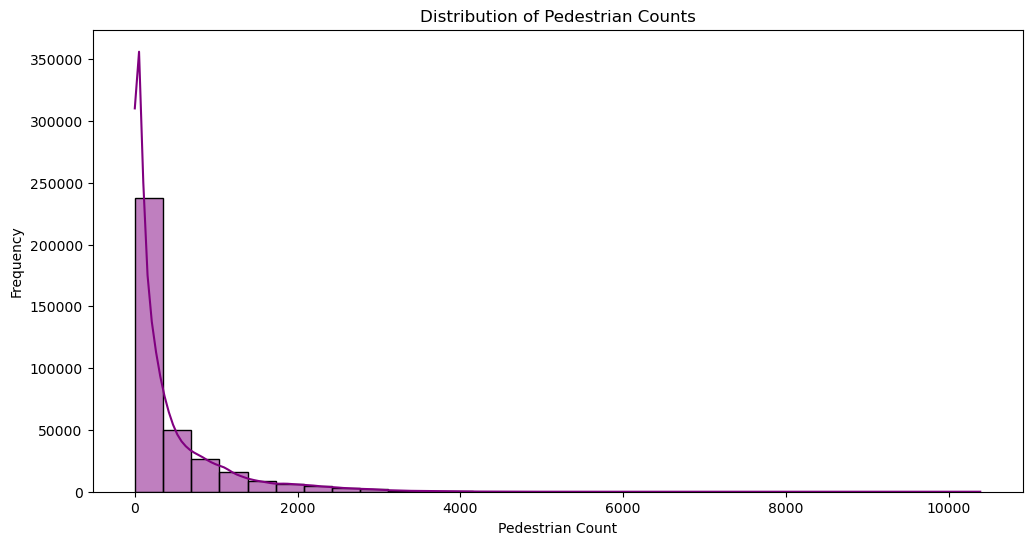

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


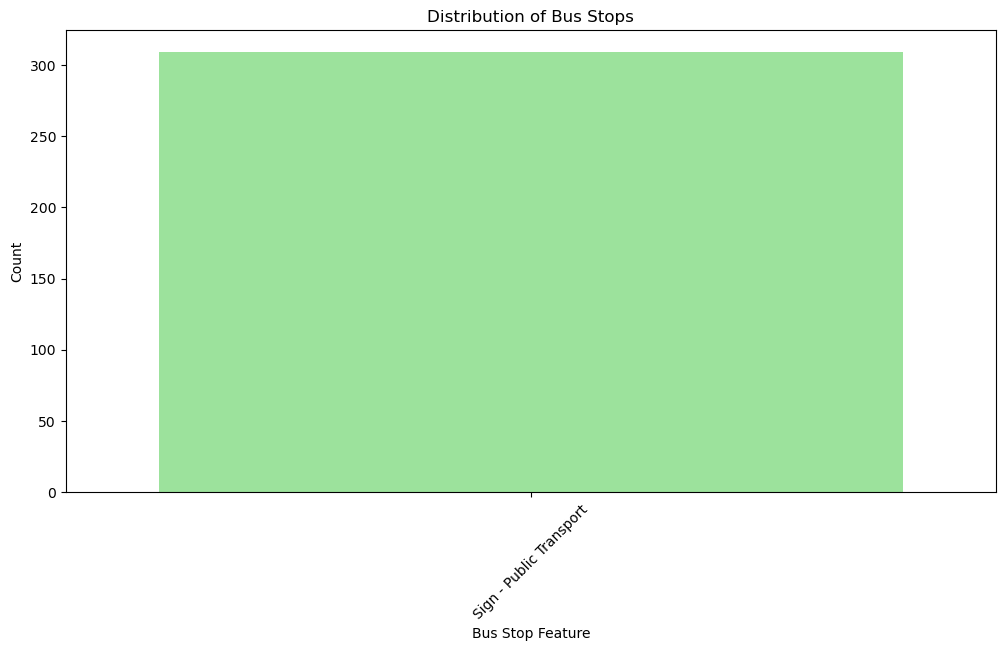

<Figure size 1200x1200 with 0 Axes>

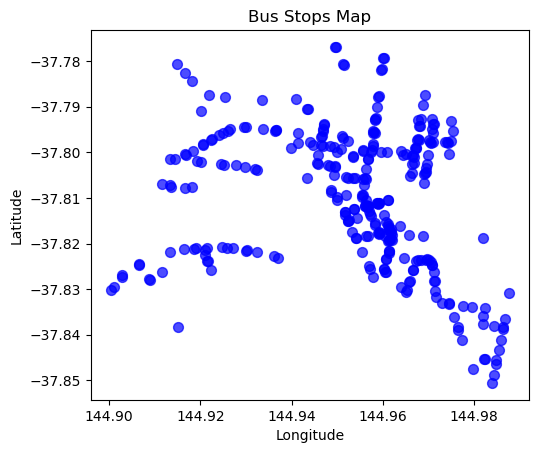

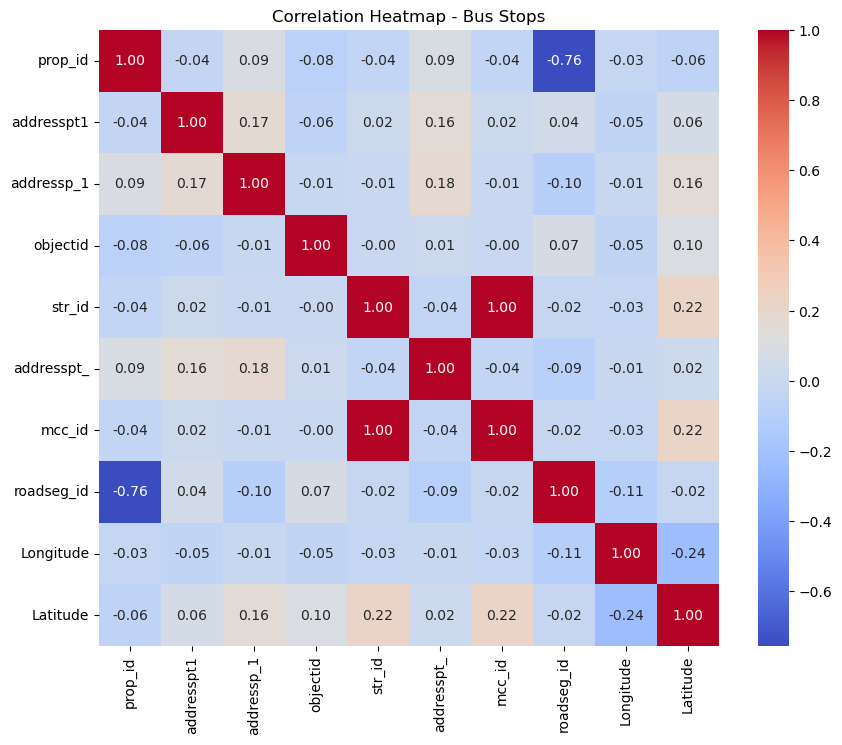

In [11]:
#Display basic information about Datasets, just to make sure that all the enteris are non-null
print("Bus Stops Dataset:")
data1.info()

print("pedestrains Counts Dataset:")
data2.info()


# Plot the distribution of pedestrian counts
plt.figure(figsize=(12, 6))
sns.histplot(data2['Total_of_Directions'], bins=30, kde=True, color='purple')
plt.title('Distribution of Pedestrian Counts')
plt.xlabel('Pedestrian Count')
plt.ylabel('Frequency')
plt.show()

# Assuming 'asset_type' represents the bus stop feature in the bus-stop dataset
# Plot the distribution of bus stops
plt.figure(figsize=(12, 6))
sns.countplot(data1['asset_type'], color='lightgreen')
plt.title('Distribution of Bus Stops')
plt.xlabel('Bus Stop Feature')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



# Visualization: Bus Stops Map
# Extract latitude and longitude from Geo Shape
data1['coordinates'] = data1['Geo Shape'].apply(lambda x: eval(x)['coordinates'] if pd.notnull(x) else None)
data1[['Longitude', 'Latitude']] = pd.DataFrame(data1['coordinates'].tolist(), index=data1.index)

# Create a GeoDataFrame
gdf_data1 = gpd.GeoDataFrame(data1, geometry=gpd.points_from_xy(data1['Longitude'], data1['Latitude']))

# Customize the plot
plt.figure(figsize=(12, 12))
gdf_data1.plot(marker='o', color='blue', markersize=50, alpha=0.7)
plt.title('Bus Stops Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Visualization : Correlation Heatmap
correlation_matrix = data1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Bus Stops')
plt.show()

#Explore Temporal patterns in Pedestrains count

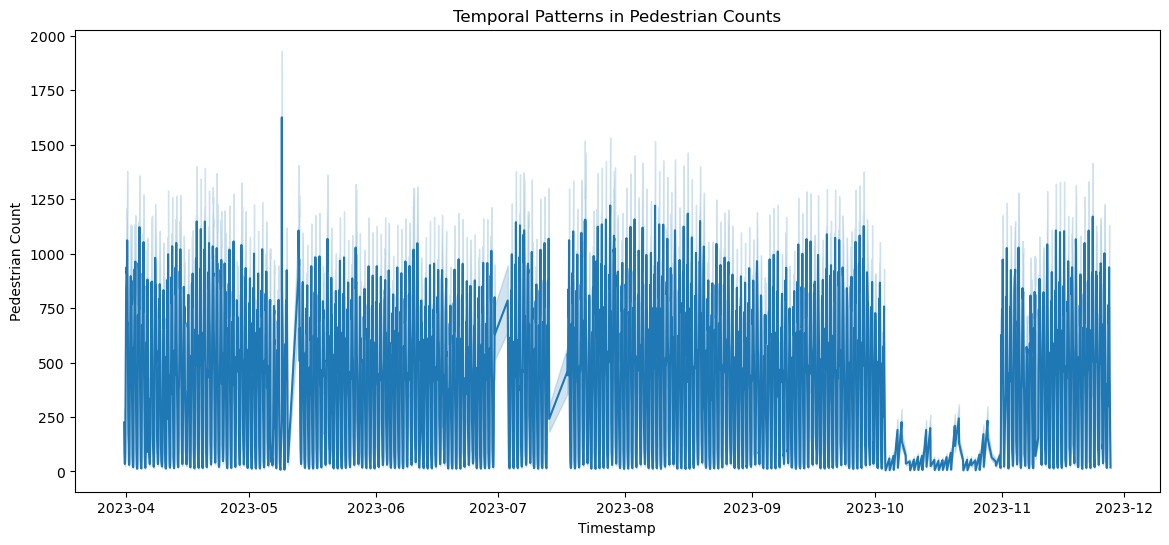

In [15]:
# 'SensingDateTime(Hour)' represents the timestamp in the pedestrian dataset
data2['SensingDateTime(Hour)'] = pd.to_datetime(data2['SensingDateTime(Hour)'], utc=True)

# Plot temporal patterns in pedestrian counts
plt.figure(figsize=(14, 6))
sns.lineplot(x='SensingDateTime(Hour)', y='Total_of_Directions', data=data2)
plt.title('Temporal Patterns in Pedestrian Counts')
plt.xlabel('Timestamp')
plt.ylabel('Pedestrian Count')
plt.show()


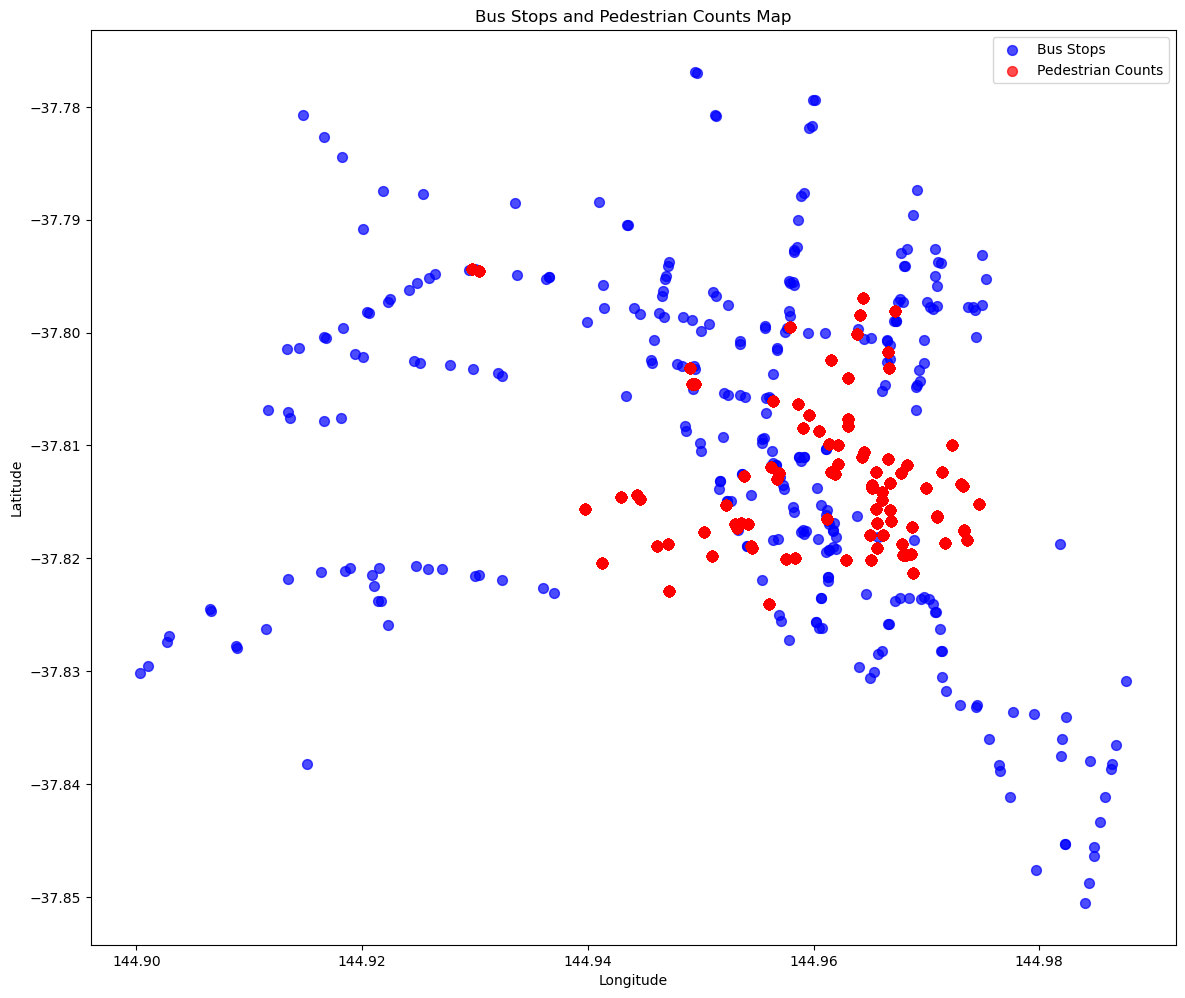

In [41]:
# Split "Location" column into "Latitude" and "Longitude" for pedestrian counts
data2[['Latitude', 'Longitude']] = data2['Location'].str.split(', ', expand=True).astype(float)
gdf_data2 = gpd.GeoDataFrame(data2, geometry=gpd.points_from_xy(data2['Longitude'], data2['Latitude']))

# Plotting
fig, ax = plt.subplots(figsize=(14, 14))
gdf_data1.plot(ax=ax, color='blue', label='Bus Stops', markersize=50, alpha=0.7)
gdf_data2.plot(ax=ax, color='red', label='Pedestrian Counts', markersize=50, alpha=0.7)

# Customize the plot
ax.set_title('Bus Stops and Pedestrian Counts Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

plt.show()



Created a map by merging both datasets.

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create a folium map centered around the mean coordinates of the bus stops
map_center = [data1['Latitude'].mean(), data1['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# Add bus stops to the map
for index, row in data1.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['descriptio']).add_to(mymap)

# Add pedestrian counts to the map
marker_cluster = MarkerCluster().add_to(mymap)
for index, row in data2.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Sensor_Name']).add_to(marker_cluster)

# Save the map as an HTML file
mymap.save("bus_stops_pedestrian_counts_map.html")

# Display the map
mymap

References:

https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/export/?sort=timestamp

https://data.melbourne.vic.gov.au/explore/dataset/bus-stops/export/

https://www.w3schools.com/python/pandas/default.asp

https://python-visualization.github.io/folium/latest/